<a href="https://colab.research.google.com/github/OsmarVar/Unidad-1-Simulacion/blob/main/Metodo_de_aceptacion_y_rechazo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm,beta,uniform

In [64]:
# Definir los parámetros de la distribución Beta objetivo
a, b = 2,5

In [69]:
# Definir la distribución de propuesta: Uniforme(0, 1)
propuesta = uniform(0 , 1)

In [70]:
# Calcular la constante M tal que f(x) <= M * g(x)
# En este caso, podemos encontrar el valor máximo de la PDF de Beta
x = np.linspace(0, 1, 1000)
M = max(beta.pdf(x, a, b))

In [71]:
# Muestreo por Aceptación y Rechazo
def aceptacion_rechazo(beta_a, beta_b, M, tamaño=1000):
    muestras = []
    while len(muestras) < tamaño:
        u = uniform.rvs()
        x = uniform.rvs()
        if u < beta.pdf(x, beta_a, beta_b) / (M * propuesta.pdf(x)):
            muestras.append(x)
    return np.array(muestras)

In [72]:
# Generar muestras
muestras = aceptacion_rechazo(a, b, M, tamaño=1000)

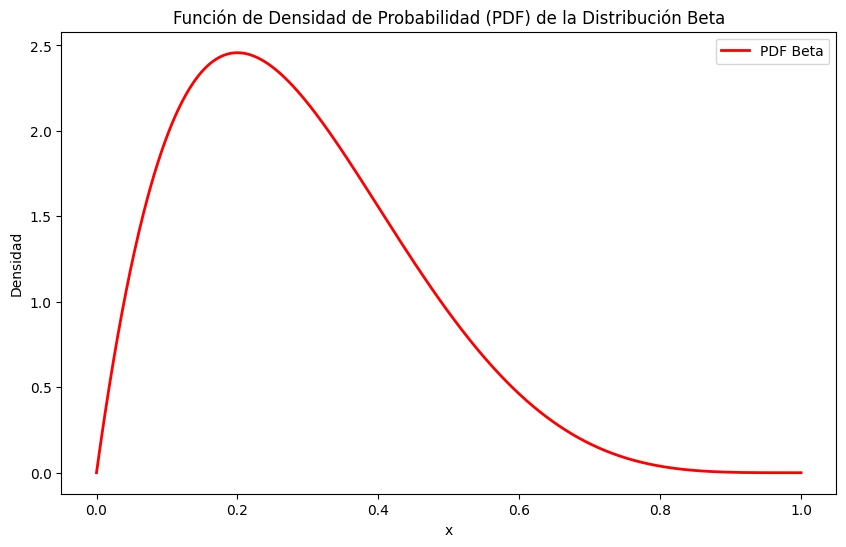

In [74]:
# Graficar la PDF de Beta
plt.figure(figsize=(10, 6))
plt.plot(x, beta.pdf(x, a, b), 'r-', lw=2, label='PDF Beta')
plt.title('Función de Densidad de Probabilidad (PDF) de la Distribución Beta')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.show()

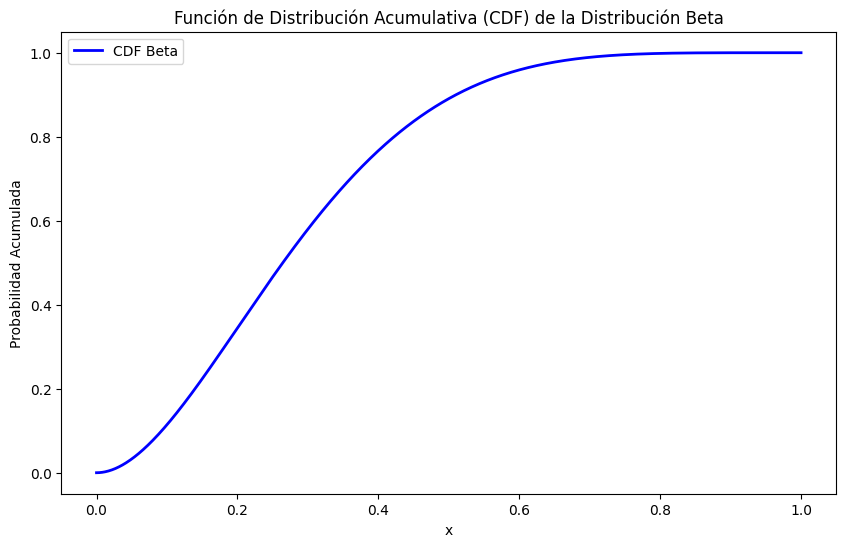

In [75]:
# Graficar la Función de Distribución Acumulativa (CDF) de la distribución Beta
plt.figure(figsize=(10, 6))
plt.plot(x, beta.cdf(x, a, b), 'b-', lw=2, label='CDF Beta')
plt.title('Función de Distribución Acumulativa (CDF) de la Distribución Beta')
plt.xlabel('x')
plt.ylabel('Probabilidad Acumulada')
plt.legend()
plt.show()

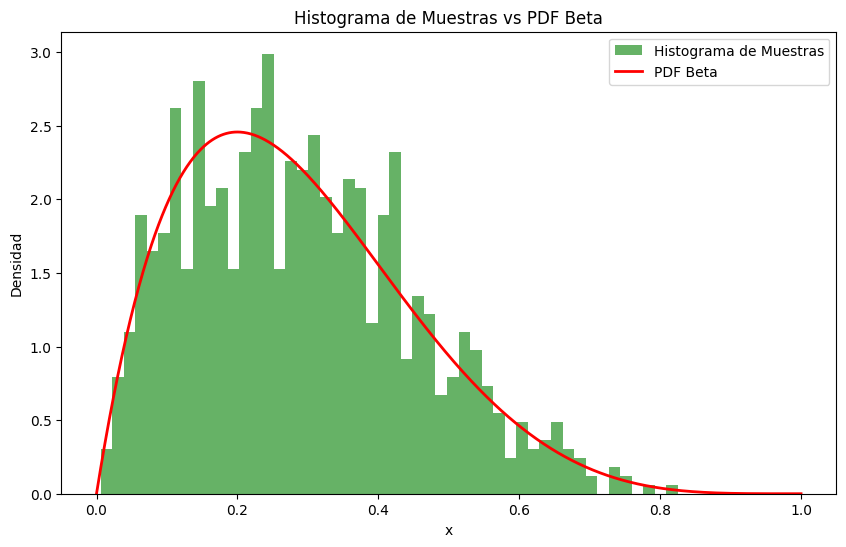

In [76]:
# Graficar el histograma de las muestras
plt.figure(figsize=(10, 6))
plt.hist(muestras, bins=50, density=True, alpha=0.6, color='g', label='Histograma de Muestras')
plt.plot(x, beta.pdf(x, a, b), 'r-', lw=2, label='PDF Beta')
plt.title('Histograma de Muestras vs PDF Beta')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.show()